# Machine Learning Model Building Steps

## 1 - Explore the Dataset

### 1.1 - Understand the Data

In [42]:
# load the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/mobile_price.csv")
print(df.head())

   Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9  


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [44]:
df.describe().round(2)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.0,161.00,161.00,161.00,161.00,161.00
mean,675.56,2215.60,621.47,170.43,5.21,335.06,4.86,1.50,24.5,2.20,10.38,4.50,2842.11,8.92
std,410.85,768.19,1546.62,92.89,1.51,134.83,2.44,0.60,28.8,1.61,6.18,4.34,1366.99,2.19
min,10.00,614.00,10.00,66.00,1.40,121.00,0.00,0.00,0.0,0.00,0.00,0.00,800.00,5.10
25%,237.00,1734.00,37.00,134.10,4.80,233.00,4.00,1.20,8.0,1.00,5.00,0.00,2040.00,7.60
50%,774.00,2258.00,106.00,153.00,5.15,294.00,4.00,1.40,16.0,2.00,12.00,5.00,2800.00,8.40
75%,1026.00,2744.00,382.00,170.00,5.50,428.00,8.00,1.88,32.0,3.00,16.00,8.00,3240.00,9.80
max,1339.00,4361.00,9807.00,753.00,12.20,806.00,8.00,2.70,128.0,6.00,23.00,20.00,9500.00,18.50


### 1.2 - Examine Statistical Summary

In [45]:
# Examine Statistical Summary
num_cols = df.select_dtypes(include = "number").columns[1:]

for i in num_cols:
  print(f"Summary Statistics for - '{i}'")
  print(f"Mean \t : {df[i].mean().round(4)}")
  print(f"Median \t : {df[i].median()}")
  print(f"Mode \t : {df[i].mode().values[0]}")
  print(f"Std \t : {df[i].std()}")
  print(f"Min \t : {df[i].min()}")
  print(f"Max \t : {df[i].max()} \n")

Summary Statistics for - 'Price'
Mean 	 : 2215.5963
Median 	 : 2258.0
Mode 	 : 1734
Std 	 : 768.1871710306187
Min 	 : 614
Max 	 : 4361 

Summary Statistics for - 'Sale'
Mean 	 : 621.4658
Median 	 : 106.0
Mode 	 : 16
Std 	 : 1546.6185172459946
Min 	 : 10
Max 	 : 9807 

Summary Statistics for - 'weight'
Mean 	 : 170.4261
Median 	 : 153.0
Mode 	 : 150.0
Std 	 : 92.8886124087199
Min 	 : 66.0
Max 	 : 753.0 

Summary Statistics for - 'resoloution'
Mean 	 : 5.2099
Median 	 : 5.15
Mode 	 : 5.5
Std 	 : 1.5099530195069029
Min 	 : 1.4
Max 	 : 12.2 

Summary Statistics for - 'ppi'
Mean 	 : 335.0559
Median 	 : 294.0
Mode 	 : 294
Std 	 : 134.82665947649247
Min 	 : 121
Max 	 : 806 

Summary Statistics for - 'cpu core'
Mean 	 : 4.8571
Median 	 : 4.0
Mode 	 : 4
Std 	 : 2.444016015846517
Min 	 : 0
Max 	 : 8 

Summary Statistics for - 'cpu freq'
Mean 	 : 1.5028
Median 	 : 1.4
Mode 	 : 1.2
Std 	 : 0.5997827026934924
Min 	 : 0.0
Max 	 : 2.7 

Summary Statistics for - 'internal mem'
Mean 	 : 24.5017
Median 

### 1.3 - Correlation Analysis

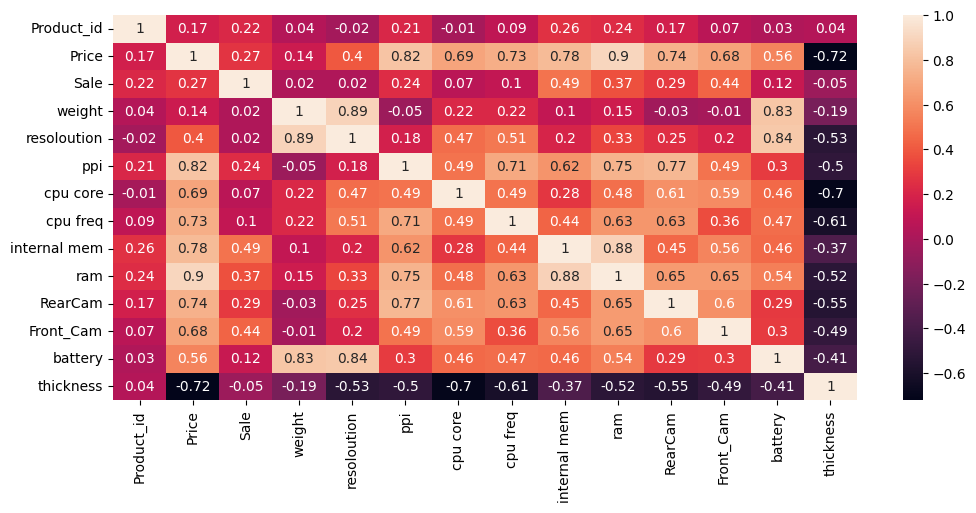

In [46]:
# Correlation Analysis
plt.figure(figsize = (12, 5))
sns.heatmap(df.corr().round(2), annot = True)
plt.show()

In [47]:
# correlation anlaysis with target
correlation = df.corr()
with_target = correlation["Price"].sort_values(ascending = False)
print(with_target[1: 5])

ram             0.896915
ppi             0.817614
internal mem    0.776738
RearCam         0.739538
Name: Price, dtype: float64


### 1.4 - Relationship Analysis

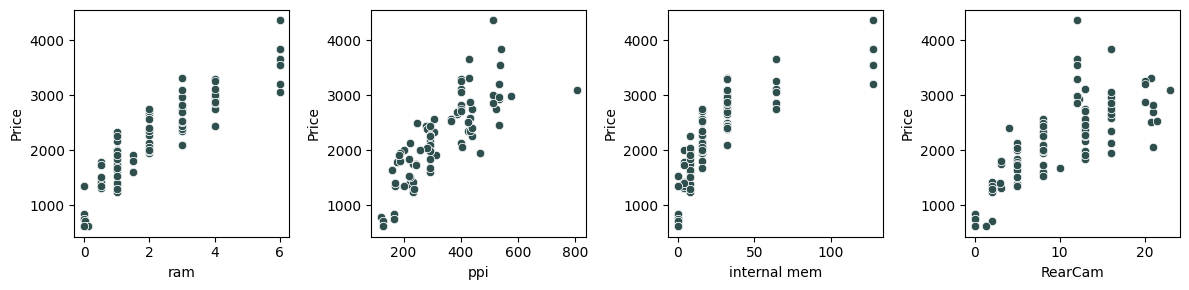

In [48]:
# Relationship Analysis
top_features = ["ram", "ppi", "internal mem", "RearCam"]
fig, axes = plt.subplots(figsize = (12, 3), ncols = 4)

for i, col in enumerate(top_features):
  sns.scatterplot(data = df, x = col, y = "Price", ax = axes[i], color = "DarkslateGray")
plt.tight_layout()
plt.show()


## 2 - Prepare the Data

### 2.1 - Feature Selection

In [49]:
# Feature Selection
X = df[top_features] # -------- Features
y = df["Price"]        # -------- Target

### 2.2 - Split the Dataset

In [50]:
# Split the Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f"Default dataset  : {df.shape}")
print(f"X_train shape \t : {X_train.shape}")
print(f"y_train shape \t : {y_train.shape}")
print(f"X_test shape \t : {X_test.shape}")
print(f"y_test shape \t : {y_test.shape}")

Default dataset  : (161, 14)
X_train shape 	 : (128, 4)
y_train shape 	 : (128,)
X_test shape 	 : (33, 4)
y_test shape 	 : (33,)


## 3 - Build and Train the Model

### 3.1 - Create a Linear Regression Model

In [51]:
# Create a Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

### 3.2 - Train the Model

In [52]:
# Train the Model
lr.fit(X_train, y_train)

LinearRegression()

## 4 - Evaluate the Model

### 4.1 - Predict

In [53]:
# Predict
slope = lr.coef_
intercept = lr.intercept_
print(f"Slope \t- {slope}")
print(f"intercept \t- {intercept}")

Slope 	- [275.46582342   1.40977899   0.54950628  19.95566911]
intercept 	- 915.6007300109341


In [57]:
y_pred = lr.predict(X_test)

In [58]:
train_result = pd.DataFrame({"Actual" : y_train, "Predicted" : y_pred_train, "error" : y_train - y_pred_train})
train_result.head().round(2)

,Actual,Predicted,error
115,2858,3077.56,-219.56
2,1916,2032.47,-116.47
123,2001,1998.69,2.31
45,1989,2149.22,-160.22
42,1843,1602.57,240.43


### 4.2 - Metrics Calculation

In [60]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(f"R2_Score \t\t\t - {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error \t\t - {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error \t\t - {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Sqaured Error \t - {mean_squared_error(y_test, y_pred) ** 0.5}")

R2_Score 			 - 0.8527642432104721
Mean Absolute Error 		 - 246.3259884930061
Mean Squared Error 		 - 83466.33539234826
Root Mean Sqaured Error 	 - 288.90540907423014


## 5 - Conclude the Analysis

#### 5.1 - Model Evoluation

### Insights and discussion

- R2_Score - $0.85$ it captures most of the variences in mobile price.

- The difference between MAE $ (246.33) $ and RMSE  $(288.91)$ confirms the presence of larger errors in predicions.

- $ Size, Ram, processor Speed $ has high correlation with Price.

- High coefficients are indicates strong influence with price.

- positive coefficient relates direct relationship and negative relates indirect.